# Data Analysis and Preparation

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Oxbow Power

In [2]:
ox_pwr_df = pd.read_csv('./data/oxbow_power.csv')

In [3]:
ox_pwr_df = ox_pwr_df.set_index('Index')

In [4]:
ox_pwr_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2057
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          2058 non-null   object 
 1   Value              2058 non-null   float64
 2   UnitsAbbreviation  2058 non-null   object 
 3   Good               2058 non-null   bool   
 4   Questionable       2058 non-null   bool   
 5   Substituted        2058 non-null   bool   
 6   Annotated          2058 non-null   bool   
dtypes: bool(4), float64(1), object(2)
memory usage: 72.4+ KB


In [5]:
ox_pwr_df.isnull().any()

Timestamp            False
Value                False
UnitsAbbreviation    False
Good                 False
Questionable         False
Substituted          False
Annotated            False
dtype: bool

In [6]:
ox_pwr_df.isnull().any(axis=1).sum()

0

In [7]:
ox_pwr_df['Good'].value_counts()

Good
True    2058
Name: count, dtype: int64

In [8]:
ox_pwr_df['Questionable'].value_counts()

Questionable
False    2052
True        6
Name: count, dtype: int64

In [9]:
ox_pwr_df[ox_pwr_df['Questionable']]

,Timestamp,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated
Index,,,,,,,
240,2018-08-29T07:00:00Z,2.845268,MW,True,True,False,False
241,2018-08-30T07:00:00Z,2.845268,MW,True,True,False,False
296,2018-10-24T07:00:00Z,0.000000,MW,True,True,False,False
465,2019-04-11T07:00:00Z,0.000000,MW,True,True,False,False
664,2019-10-27T07:00:00Z,0.000000,MW,True,True,False,False
982,2020-09-09T07:00:00Z,0.000000,MW,True,True,False,False


In [10]:
len(ox_pwr_df)

2058

In [11]:
# just drop the six Questionable rows
ox_pwr_df = ox_pwr_df[ox_pwr_df['Questionable'] != True]

In [12]:
ox_pwr_df['Substituted'].value_counts()

Substituted
False    2052
Name: count, dtype: int64

In [13]:
ox_pwr_df['Annotated'].value_counts()

Annotated
False    2052
Name: count, dtype: int64

In [14]:
ox_pwr_df['Datetime'] = pd.to_datetime(ox_pwr_df['Timestamp'])

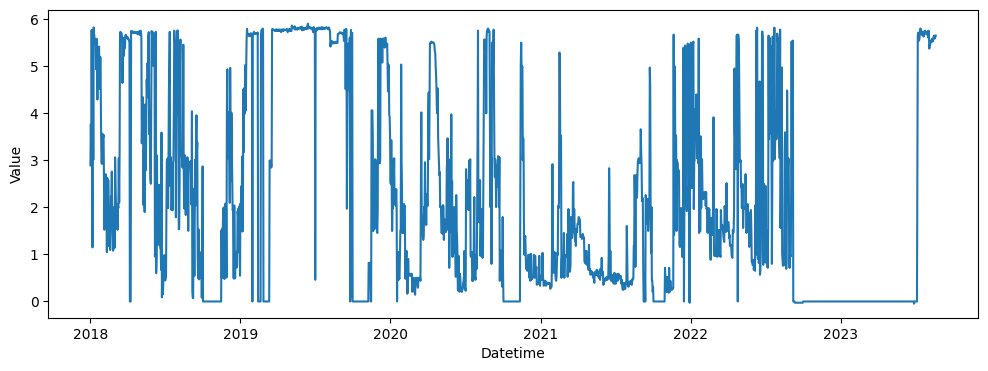

In [15]:
plt.figure(figsize=(12,4))
sns.lineplot(data=ox_pwr_df, x='Datetime', y='Value')
plt.show()

In [16]:
rn_dict = {'Value': 'OxbowPower'}
ox_pwr_df = ox_pwr_df.rename(columns=rn_dict)

In [17]:
ox_pwr_df['Date'] = ox_pwr_df['Datetime'].dt.date

In [18]:
ox_pwr_df = ox_pwr_df.drop(columns=['Datetime', 'Timestamp', 'UnitsAbbreviation', 'Good', 'Questionable', 'Substituted', 'Annotated'])

In [19]:
ox_pwr_df.head()

,OxbowPower,Date
Index,,
0,2.892164,2018-01-01
1,3.767556,2018-01-02
2,3.134460,2018-01-03
3,5.768452,2018-01-04
4,3.728476,2018-01-05


## Oxbow Flows

In [20]:
ox_df = pd.read_csv('./data/oxbow_flows.csv')

In [21]:
ox_df = ox_df.set_index('Index')

In [22]:
ox_df.index.names

FrozenList(['Index'])

In [23]:
# ox_df.index.names = ['idx']

In [24]:
ox_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2057
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Timestamp          2058 non-null   object 
 1   Value              2058 non-null   float64
 2   UnitsAbbreviation  2058 non-null   object 
 3   Good               2058 non-null   bool   
 4   Questionable       2058 non-null   bool   
 5   Substituted        2058 non-null   bool   
 6   Annotated          2058 non-null   bool   
dtypes: bool(4), float64(1), object(2)
memory usage: 72.4+ KB


In [25]:
ox_df.head()

,Timestamp,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated
Index,,,,,,,
0,2018-01-01T08:00:00Z,272.556824,CFS,True,False,False,False
1,2018-01-02T08:00:00Z,253.365768,CFS,True,False,False,False
2,2018-01-03T08:00:00Z,672.777900,CFS,True,False,False,False
3,2018-01-04T08:00:00Z,574.729000,CFS,True,False,False,False
4,2018-01-05T08:00:00Z,533.206500,CFS,True,False,False,False


In [26]:
ox_df.isnull().any()

Timestamp            False
Value                False
UnitsAbbreviation    False
Good                 False
Questionable         False
Substituted          False
Annotated            False
dtype: bool

In [27]:
ox_df.isnull().any(axis=1).sum()

0

In [28]:
ox_df['Good'].value_counts()

Good
True    2058
Name: count, dtype: int64

In [29]:
ox_df['Questionable'].value_counts()

Questionable
False    2058
Name: count, dtype: int64

In [30]:
ox_df['Substituted'].value_counts()

Substituted
False    2058
Name: count, dtype: int64

In [31]:
ox_df['Annotated'].value_counts()

Annotated
False    2058
Name: count, dtype: int64

In [32]:
ox_df['Datetime'] = pd.to_datetime(ox_df['Timestamp'])

In [33]:
ox_df

,Timestamp,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated,Datetime
Index,,,,,,,,
0,2018-01-01T08:00:00Z,272.556824,CFS,True,False,False,False,2018-01-01 08:00:00+00:00
1,2018-01-02T08:00:00Z,253.365768,CFS,True,False,False,False,2018-01-02 08:00:00+00:00
2,2018-01-03T08:00:00Z,672.777900,CFS,True,False,False,False,2018-01-03 08:00:00+00:00
3,2018-01-04T08:00:00Z,574.729000,CFS,True,False,False,False,2018-01-04 08:00:00+00:00
4,2018-01-05T08:00:00Z,533.206500,CFS,True,False,False,False,2018-01-05 08:00:00+00:00
...,...,...,...,...,...,...,...,...
2053,2023-08-16T07:00:00Z,1008.626280,CFS,True,False,False,False,2023-08-16 07:00:00+00:00
2054,2023-08-17T07:00:00Z,1012.407470,CFS,True,False,False,False,2023-08-17 07:00:00+00:00
2055,2023-08-18T07:00:00Z,1001.064000,CFS,True,False,False,False,2023-08-18 07:00:00+00:00


In [34]:
ox_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2057
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Timestamp          2058 non-null   object             
 1   Value              2058 non-null   float64            
 2   UnitsAbbreviation  2058 non-null   object             
 3   Good               2058 non-null   bool               
 4   Questionable       2058 non-null   bool               
 5   Substituted        2058 non-null   bool               
 6   Annotated          2058 non-null   bool               
 7   Datetime           2058 non-null   datetime64[ns, UTC]
dtypes: bool(4), datetime64[ns, UTC](1), float64(1), object(2)
memory usage: 88.4+ KB


In [35]:
ox_df['Datetime'].dt.strftime('%m/%d/%Y %I:%M %p %Z')

Index
0       01/01/2018 08:00 AM UTC
1       01/02/2018 08:00 AM UTC
2       01/03/2018 08:00 AM UTC
3       01/04/2018 08:00 AM UTC
4       01/05/2018 08:00 AM UTC
                 ...           
2053    08/16/2023 07:00 AM UTC
2054    08/17/2023 07:00 AM UTC
2055    08/18/2023 07:00 AM UTC
2056    08/19/2023 07:00 AM UTC
2057    08/20/2023 07:00 AM UTC
Name: Datetime, Length: 2058, dtype: object

In [36]:
ox_df['Datetime'].dt.tz_convert('America/Los_Angeles').dt.strftime('%m/%d/%Y %I:%M %p %Z')

Index
0       01/01/2018 12:00 AM PST
1       01/02/2018 12:00 AM PST
2       01/03/2018 12:00 AM PST
3       01/04/2018 12:00 AM PST
4       01/05/2018 12:00 AM PST
                 ...           
2053    08/16/2023 12:00 AM PDT
2054    08/17/2023 12:00 AM PDT
2055    08/18/2023 12:00 AM PDT
2056    08/19/2023 12:00 AM PDT
2057    08/20/2023 12:00 AM PDT
Name: Datetime, Length: 2058, dtype: object

In [37]:
# import pytz
#pytz.all_timezones_set

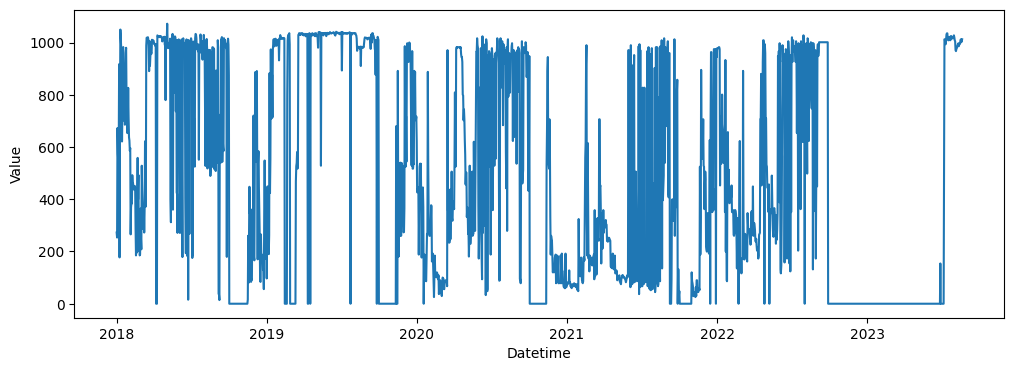

In [38]:
plt.figure(figsize=(12,4))
sns.lineplot(data=ox_df, x='Datetime', y='Value')
plt.show()

In [39]:
ox_df[ox_df['Value'] > 1000]

,Timestamp,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated,Datetime
Index,,,,,,,,
9,2018-01-10T08:00:00Z,1049.62073,CFS,True,False,False,False,2018-01-10 08:00:00+00:00
10,2018-01-11T08:00:00Z,1013.33215,CFS,True,False,False,False,2018-01-11 08:00:00+00:00
73,2018-03-15T07:00:00Z,1018.56616,CFS,True,False,False,False,2018-03-15 07:00:00+00:00
74,2018-03-16T07:00:00Z,1016.12366,CFS,True,False,False,False,2018-03-16 07:00:00+00:00
75,2018-03-17T07:00:00Z,1016.47260,CFS,True,False,False,False,2018-03-17 07:00:00+00:00
...,...,...,...,...,...,...,...,...
2053,2023-08-16T07:00:00Z,1008.62628,CFS,True,False,False,False,2023-08-16 07:00:00+00:00
2054,2023-08-17T07:00:00Z,1012.40747,CFS,True,False,False,False,2023-08-17 07:00:00+00:00
2055,2023-08-18T07:00:00Z,1001.06400,CFS,True,False,False,False,2023-08-18 07:00:00+00:00


In [40]:
ox_df.sort_values('Value')

,Timestamp,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated,Datetime
Index,,,,,,,,
1028,2020-10-25T07:00:00Z,0.00000,CFS,True,False,False,False,2020-10-25 07:00:00+00:00
1762,2022-10-29T07:00:00Z,0.00000,CFS,True,False,False,False,2022-10-29 07:00:00+00:00
1030,2020-10-27T07:00:00Z,0.00000,CFS,True,False,False,False,2020-10-27 07:00:00+00:00
1029,2020-10-26T07:00:00Z,0.00000,CFS,True,False,False,False,2020-10-26 07:00:00+00:00
1763,2022-10-30T07:00:00Z,0.00000,CFS,True,False,False,False,2022-10-30 07:00:00+00:00
...,...,...,...,...,...,...,...,...
519,2019-06-04T07:00:00Z,1039.85071,CFS,True,False,False,False,2019-06-04 07:00:00+00:00
492,2019-05-08T07:00:00Z,1040.19971,CFS,True,False,False,False,2019-05-08 07:00:00+00:00
534,2019-06-19T07:00:00Z,1041.24646,CFS,True,False,False,False,2019-06-19 07:00:00+00:00


In [41]:
ox_df.sort_values('Value', ascending=False)

,Timestamp,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated,Datetime
Index,,,,,,,,
123,2018-05-04T07:00:00Z,1071.95215,CFS,True,False,False,False,2018-05-04 07:00:00+00:00
9,2018-01-10T08:00:00Z,1049.62073,CFS,True,False,False,False,2018-01-10 08:00:00+00:00
534,2019-06-19T07:00:00Z,1041.24646,CFS,True,False,False,False,2019-06-19 07:00:00+00:00
492,2019-05-08T07:00:00Z,1040.19971,CFS,True,False,False,False,2019-05-08 07:00:00+00:00
549,2019-07-04T07:00:00Z,1039.85071,CFS,True,False,False,False,2019-07-04 07:00:00+00:00
...,...,...,...,...,...,...,...,...
302,2018-10-30T07:00:00Z,0.00000,CFS,True,False,False,False,2018-10-30 07:00:00+00:00
303,2018-10-31T07:00:00Z,0.00000,CFS,True,False,False,False,2018-10-31 07:00:00+00:00
304,2018-11-01T07:00:00Z,0.00000,CFS,True,False,False,False,2018-11-01 07:00:00+00:00


In [42]:
ox_df[ox_df['Value'] == 0]

,Timestamp,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated,Datetime
Index,,,,,,,,
96,2018-04-07T07:00:00Z,0.0,CFS,True,False,False,False,2018-04-07 07:00:00+00:00
97,2018-04-08T07:00:00Z,0.0,CFS,True,False,False,False,2018-04-08 07:00:00+00:00
98,2018-04-09T07:00:00Z,0.0,CFS,True,False,False,False,2018-04-09 07:00:00+00:00
274,2018-10-02T07:00:00Z,0.0,CFS,True,False,False,False,2018-10-02 07:00:00+00:00
275,2018-10-03T07:00:00Z,0.0,CFS,True,False,False,False,2018-10-03 07:00:00+00:00
...,...,...,...,...,...,...,...,...
2008,2023-07-02T07:00:00Z,0.0,CFS,True,False,False,False,2023-07-02 07:00:00+00:00
2009,2023-07-03T07:00:00Z,0.0,CFS,True,False,False,False,2023-07-03 07:00:00+00:00
2010,2023-07-04T07:00:00Z,0.0,CFS,True,False,False,False,2023-07-04 07:00:00+00:00


In [43]:
len(ox_df)

2058

In [44]:
ox_df = ox_df[ox_df['Value'] != 0]

In [45]:
len(ox_df)

1581

In [46]:
rn_dict = {'Value': 'OxbowFlow'}
ox_df = ox_df.rename(columns=rn_dict)

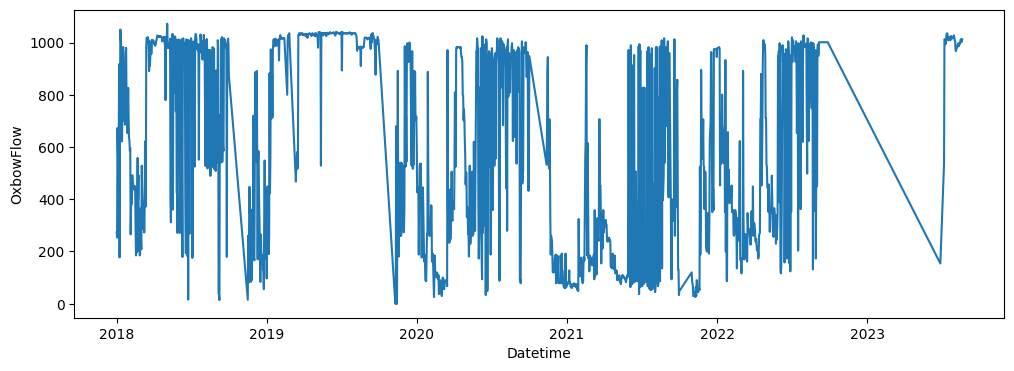

In [47]:
plt.figure(figsize=(12,4))
sns.lineplot(data=ox_df, x='Datetime', y='OxbowFlow')
plt.show()

In [48]:
# ox_df[ox_df['Datetime'].dt.year == 2023]

In [49]:
ox_df['Date'] = ox_df['Datetime'].dt.date

In [50]:
ox_df = ox_df.drop(columns=['Datetime', 'Timestamp', 'UnitsAbbreviation', 'Good', 'Questionable', 'Substituted', 'Annotated'])

In [51]:
ox_df

,OxbowFlow,Date
Index,,
0,272.556824,2018-01-01
1,253.365768,2018-01-02
2,672.777900,2018-01-03
3,574.729000,2018-01-04
4,533.206500,2018-01-05
...,...,...
2053,1008.626280,2023-08-16
2054,1012.407470,2023-08-17
2055,1001.064000,2023-08-18


## Hell Hole Storage

In [52]:
hh_df = pd.read_csv('./data/hell_hole_storage.csv')

In [53]:
hh_df = hh_df.set_index('Index')

In [54]:
hh_df.head()

,Timestamp,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated
Index,,,,,,,
0,2018-01-01T08:00:00Z,109262.4,acre ft,True,False,False,False
1,2018-01-02T08:00:00Z,108832.6,acre ft,True,False,False,False
2,2018-01-03T08:00:00Z,107713.5,acre ft,True,False,False,False
3,2018-01-04T08:00:00Z,106513.1,acre ft,True,False,False,False
4,2018-01-05T08:00:00Z,105620.7,acre ft,True,False,False,False


In [55]:
hh_df['Datetime'] = pd.to_datetime(hh_df['Timestamp'])

In [56]:
hh_df = hh_df.drop(columns=['Timestamp'])

<Axes: xlabel='Datetime', ylabel='Value'>

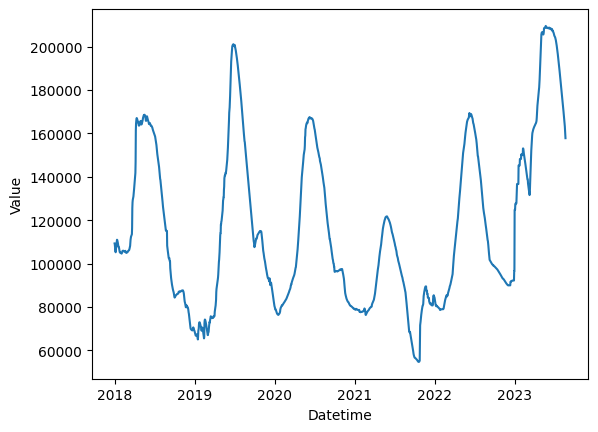

In [57]:
sns.lineplot(data=hh_df, x='Datetime', y='Value')

In [58]:
hh_df.isnull().any()

Value                False
UnitsAbbreviation    False
Good                 False
Questionable         False
Substituted          False
Annotated            False
Datetime             False
dtype: bool

In [59]:
hh_df.isnull().any(axis=1).sum()

0

In [60]:
hh_df['Good'].value_counts()

Good
True    2058
Name: count, dtype: int64

In [61]:
hh_df['Questionable'].value_counts()

Questionable
False    2058
Name: count, dtype: int64

In [62]:
hh_df['Annotated'].value_counts()

Annotated
False    2058
Name: count, dtype: int64

In [63]:
hh_df['Substituted'].value_counts()

Substituted
False    2054
True        4
Name: count, dtype: int64

In [64]:
hh_df[hh_df['Substituted'] == True]

,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated,Datetime
Index,,,,,,,
487,119327.0,acre ft,True,False,True,False,2019-05-03 07:00:00+00:00
499,134155.0,acre ft,True,False,True,False,2019-05-15 07:00:00+00:00
504,140665.0,acre ft,True,False,True,False,2019-05-20 07:00:00+00:00
519,158747.0,acre ft,True,False,True,False,2019-06-04 07:00:00+00:00


In [65]:
# I should look into what "Substituted" implies in PI Web API

In [66]:
hh_df = hh_df.drop(columns=['UnitsAbbreviation', 'Good', 'Questionable', 'Substituted', 'Annotated'])

In [67]:
hh_df.columns = ['HH_Acre_ft', 'Datetime']

In [68]:
hh_df.head()

,HH_Acre_ft,Datetime
Index,,
0,109262.4,2018-01-01 08:00:00+00:00
1,108832.6,2018-01-02 08:00:00+00:00
2,107713.5,2018-01-03 08:00:00+00:00
3,106513.1,2018-01-04 08:00:00+00:00
4,105620.7,2018-01-05 08:00:00+00:00


## French Meadows Storage

In [69]:
fm_df = pd.read_csv('./data/french_meadows_storage.csv')

In [70]:
fm_df = fm_df.set_index('Index')

In [71]:
fm_df['Datetime'] = pd.to_datetime(fm_df['Timestamp'])

In [72]:
fm_df = fm_df.drop(columns=['Timestamp'])

In [73]:
fm_df.head()

,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated,Datetime
Index,,,,,,,
0,51445.0,acre ft,True,False,False,False,2018-01-01 08:00:00+00:00
1,51391.8,acre ft,True,False,False,False,2018-01-02 08:00:00+00:00
2,51391.8,acre ft,True,False,False,False,2018-01-03 08:00:00+00:00
3,51270.5,acre ft,True,False,False,False,2018-01-04 08:00:00+00:00
4,51391.8,acre ft,True,False,False,False,2018-01-05 08:00:00+00:00


In [74]:
fm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2057
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   Value              2058 non-null   float64            
 1   UnitsAbbreviation  2058 non-null   object             
 2   Good               2058 non-null   bool               
 3   Questionable       2058 non-null   bool               
 4   Substituted        2058 non-null   bool               
 5   Annotated          2058 non-null   bool               
 6   Datetime           2058 non-null   datetime64[ns, UTC]
dtypes: bool(4), datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 72.4+ KB


<Axes: xlabel='Datetime', ylabel='Value'>

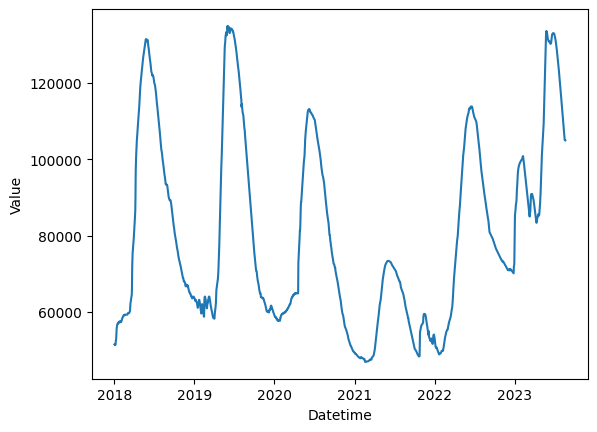

In [75]:
sns.lineplot(data=fm_df, x='Datetime', y='Value')

In [76]:
fm_df.isnull().any()

Value                False
UnitsAbbreviation    False
Good                 False
Questionable         False
Substituted          False
Annotated            False
Datetime             False
dtype: bool

In [77]:
fm_df.isnull().any(axis=1).sum()

0

In [78]:
fm_df['Good'].value_counts()

Good
True    2058
Name: count, dtype: int64

In [79]:
fm_df['Questionable'].value_counts()

Questionable
False    2058
Name: count, dtype: int64

In [80]:
fm_df['Annotated'].value_counts()

Annotated
False    2058
Name: count, dtype: int64

In [81]:
fm_df['Substituted'].value_counts()

Substituted
False    2051
True        7
Name: count, dtype: int64

In [82]:
fm_df[fm_df['Substituted'] == True]

,Value,UnitsAbbreviation,Good,Questionable,Substituted,Annotated,Datetime
Index,,,,,,,
668,63881.0,acre ft,True,False,True,False,2019-10-31 07:00:00+00:00
843,76959.0,acre ft,True,False,True,False,2020-04-23 07:00:00+00:00
847,81327.0,acre ft,True,False,True,False,2020-04-27 07:00:00+00:00
850,87366.0,acre ft,True,False,True,False,2020-04-30 07:00:00+00:00
851,88710.0,acre ft,True,False,True,False,2020-05-01 07:00:00+00:00
852,88710.0,acre ft,True,False,True,False,2020-05-02 07:00:00+00:00
853,89612.0,acre ft,True,False,True,False,2020-05-03 07:00:00+00:00


In [83]:
# I should look into what "Substituted" implies in PI Web API

In [84]:
fm_df = fm_df.drop(columns=['UnitsAbbreviation', 'Good', 'Questionable', 'Substituted', 'Annotated'])

In [85]:
fm_df.columns = ['FM_Acre_ft', 'Datetime']

In [86]:
fm_df.head()

,FM_Acre_ft,Datetime
Index,,
0,51445.0,2018-01-01 08:00:00+00:00
1,51391.8,2018-01-02 08:00:00+00:00
2,51391.8,2018-01-03 08:00:00+00:00
3,51270.5,2018-01-04 08:00:00+00:00
4,51391.8,2018-01-05 08:00:00+00:00


## Natural Gas Price

In [87]:
ng_df = pd.read_csv('./data/natural_gas_prices.csv')

In [88]:
ng_df = ng_df.set_index('Index')

In [89]:
ng_df.head()

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
Index,,,,,,,,,,,
0,2023-08-18,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.44,$/MMBTU
1,2023-08-17,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.56,$/MMBTU
2,2023-08-16,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.55,$/MMBTU
3,2023-08-15,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.65,$/MMBTU
4,2023-08-14,RGC,NaN,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.74,$/MMBTU


In [90]:
ng_df.isnull().any()

period                False
duoarea               False
area-name              True
product               False
product-name          False
process               False
process-name          False
series                False
series-description    False
value                  True
units                 False
dtype: bool

In [91]:
ng_df['area-name'].value_counts()

Series([], Name: count, dtype: int64)

In [92]:
ng_df = ng_df.drop(columns=['area-name'])

In [93]:
ng_df.isnull().any(axis=1).sum()

1

In [94]:
ng_df.isnull().any()

period                False
duoarea               False
product               False
product-name          False
process               False
process-name          False
series                False
series-description    False
value                  True
units                 False
dtype: bool

In [95]:
ng_df['value'].isnull().sum()

1

In [96]:
ng_df[ng_df['value'].isnull()]

,period,duoarea,product,product-name,process,process-name,series,series-description,value,units
Index,,,,,,,,,,
1430,2018-01-05,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,NaN,$/MMBTU


In [97]:
ng_df.iloc[1426:1435]

,period,duoarea,product,product-name,process,process-name,series,series-description,value,units
Index,,,,,,,,,,
1426,2018-01-11,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,3.16,$/MMBTU
1427,2018-01-10,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,3.16,$/MMBTU
1428,2018-01-09,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.93,$/MMBTU
1429,2018-01-08,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.89,$/MMBTU
1430,2018-01-05,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,NaN,$/MMBTU
1431,2018-01-04,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,4.65,$/MMBTU
1432,2018-01-03,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,6.24,$/MMBTU
1433,2018-01-02,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,6.24,$/MMBTU


In [98]:
ng_df.interpolate().iloc[1426:1435]

,period,duoarea,product,product-name,process,process-name,series,series-description,value,units
Index,,,,,,,,,,
1426,2018-01-11,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,3.16,$/MMBTU
1427,2018-01-10,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,3.16,$/MMBTU
1428,2018-01-09,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.93,$/MMBTU
1429,2018-01-08,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.89,$/MMBTU
1430,2018-01-05,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,3.77,$/MMBTU
1431,2018-01-04,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,4.65,$/MMBTU
1432,2018-01-03,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,6.24,$/MMBTU
1433,2018-01-02,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,6.24,$/MMBTU


In [99]:
ng_df['value'] = ng_df['value'].interpolate()

In [100]:
ng_df.iloc[1426:1435]

,period,duoarea,product,product-name,process,process-name,series,series-description,value,units
Index,,,,,,,,,,
1426,2018-01-11,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,3.16,$/MMBTU
1427,2018-01-10,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,3.16,$/MMBTU
1428,2018-01-09,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.93,$/MMBTU
1429,2018-01-08,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,2.89,$/MMBTU
1430,2018-01-05,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,3.77,$/MMBTU
1431,2018-01-04,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,4.65,$/MMBTU
1432,2018-01-03,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,6.24,$/MMBTU
1433,2018-01-02,RGC,EPG0,Natural Gas,PS0,Spot Price,RNGWHHD,Henry Hub Natural Gas Spot Price (Dollars per ...,6.24,$/MMBTU


In [101]:
ng_df['value'].isnull().sum()

0

In [102]:
ng_df.isnull().any(axis=1).sum()

0

In [103]:
ng_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1434 entries, 0 to 1433
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   period              1434 non-null   object 
 1   duoarea             1434 non-null   object 
 2   product             1434 non-null   object 
 3   product-name        1434 non-null   object 
 4   process             1434 non-null   object 
 5   process-name        1434 non-null   object 
 6   series              1434 non-null   object 
 7   series-description  1434 non-null   object 
 8   value               1434 non-null   float64
 9   units               1434 non-null   object 
dtypes: float64(1), object(9)
memory usage: 123.2+ KB


In [104]:
ng_df['duoarea'].value_counts()

duoarea
RGC    1434
Name: count, dtype: int64

In [105]:
ng_df['product'].value_counts()

product
EPG0    1434
Name: count, dtype: int64

In [106]:
ng_df['product-name'].value_counts()

product-name
Natural Gas    1434
Name: count, dtype: int64

In [107]:
ng_df['process'].value_counts()

process
PS0    1434
Name: count, dtype: int64

In [108]:
ng_df['series'].value_counts()

series
RNGWHHD    1434
Name: count, dtype: int64

In [109]:
ng_df['series-description'].value_counts()

series-description
Henry Hub Natural Gas Spot Price (Dollars per Million Btu)    1434
Name: count, dtype: int64

In [110]:
ng_df['units'].value_counts()

units
$/MMBTU    1434
Name: count, dtype: int64

In [111]:
ng_df = ng_df.drop(columns=['duoarea', 'units', 'series', 'series-description', 'process', 'process-name', 'product-name', 'product'])

In [112]:
ng_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1434 entries, 0 to 1433
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   period  1434 non-null   object 
 1   value   1434 non-null   float64
dtypes: float64(1), object(1)
memory usage: 33.6+ KB


In [113]:
ng_df.head()

,period,value
Index,,
0,2023-08-18,2.44
1,2023-08-17,2.56
2,2023-08-16,2.55
3,2023-08-15,2.65
4,2023-08-14,2.74


In [114]:
ng_df['Datetime'] = pd.to_datetime(ng_df['period'])

In [115]:
ng_df['Date'] = ng_df['Datetime'].dt.date

In [116]:
ng_df = ng_df.drop(columns=['period'])

In [117]:
ng_df.head(1)

,value,Datetime,Date
Index,,,
0,2.44,2023-08-18,2023-08-18


In [118]:
ng_df.tail(1)

,value,Datetime,Date
Index,,,
1433,6.24,2018-01-02,2018-01-02


In [119]:
ng_df = ng_df.drop(columns=['Datetime'])

In [120]:
ng_df = ng_df[['Date','value']]

In [121]:
ng_df.columns = ['Date','GasPrice']

In [122]:
ng_df.head()

,Date,GasPrice
Index,,
0,2023-08-18,2.44
1,2023-08-17,2.56
2,2023-08-16,2.55
3,2023-08-15,2.65
4,2023-08-14,2.74


In [123]:
len(ng_df)

1434

## Weather/Climate (ACIS)

In [124]:
mt_df = pd.read_csv('./data/max_temperatures.csv')

In [125]:
mt_df = mt_df.set_index('Index')

In [126]:
mt_df.head(3)

,Date,MaxTemp
Index,,
0,2018-01-01,58
1,2018-01-02,59
2,2018-01-03,60


In [127]:
mt_df.tail(3)

,Date,MaxTemp
Index,,
2055,2023-08-18,81
2056,2023-08-19,80
2057,2023-08-20,67


In [128]:
len(mt_df)

2058

In [129]:
mt_df['Datetime'] = pd.to_datetime(mt_df['Date'])

In [130]:
mt_df['Date'] = mt_df['Datetime'].dt.date # probably won't change the values, but let's be consistent and explicit with "Date" column

In [131]:
mt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2058 entries, 0 to 2057
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2058 non-null   object        
 1   MaxTemp   2058 non-null   object        
 2   Datetime  2058 non-null   datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 64.3+ KB


In [132]:
mt_df['MaxTemp'].unique()

array(['58', '59', '60', '49', '46', '45', '47', '40', '55', '64', '56',
       '51', '35', '39', '37', '38', '43', '31', '32', '66', '62', '57',
       '63', '65', '67', '61', '42', '50', '52', '53', '27', '29', '26',
       '34', '41', '36', '33', 'M', '44', '30', '48', '54', '68', '71',
       '70', '69', '72', '74', '76', '77', '73', '75', '81', '82', '84',
       '83', '79', '86', '80', '88', '89', '85', '87', '78', '24', '25',
       '28', '90', '93', '91', '92', '95', '96', '23'], dtype=object)

In [133]:
(mt_df['MaxTemp'].str.upper() == 'M').sum()

12

In [134]:
mt_df[mt_df['MaxTemp'].str.upper() == 'M']

,Date,MaxTemp,Datetime
Index,,,
64,2018-03-06,M,2018-03-06
341,2018-12-08,M,2018-12-08
667,2019-10-30,M,2019-10-30
668,2019-10-31,M,2019-10-31
804,2020-03-15,M,2020-03-15
805,2020-03-16,M,2020-03-16
806,2020-03-17,M,2020-03-17
807,2020-03-18,M,2020-03-18
1456,2021-12-27,M,2021-12-27


In [135]:
# Only a couple of these are in the Spring/Summer. Just drop these rows that have missing temperature data.

In [136]:
mt_df = mt_df[mt_df['MaxTemp'].str.upper() != 'M']

In [137]:
(mt_df['MaxTemp'].str.upper() == 'M').sum()

0

In [138]:
len(mt_df)

2046

In [139]:
mt_df['MaxTemp'].unique()

array(['58', '59', '60', '49', '46', '45', '47', '40', '55', '64', '56',
       '51', '35', '39', '37', '38', '43', '31', '32', '66', '62', '57',
       '63', '65', '67', '61', '42', '50', '52', '53', '27', '29', '26',
       '34', '41', '36', '33', '44', '30', '48', '54', '68', '71', '70',
       '69', '72', '74', '76', '77', '73', '75', '81', '82', '84', '83',
       '79', '86', '80', '88', '89', '85', '87', '78', '24', '25', '28',
       '90', '93', '91', '92', '95', '96', '23'], dtype=object)

In [140]:
mt_df['MaxTemp'] = mt_df['MaxTemp'].astype(int)

In [141]:
mt_df = mt_df.drop(columns=['Datetime'])

In [142]:
mt_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2046 entries, 0 to 2057
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     2046 non-null   object
 1   MaxTemp  2046 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 48.0+ KB


In [143]:
mt_df.head()

,Date,MaxTemp
Index,,
0,2018-01-01,58
1,2018-01-02,59
2,2018-01-03,60
3,2018-01-04,49
4,2018-01-05,46


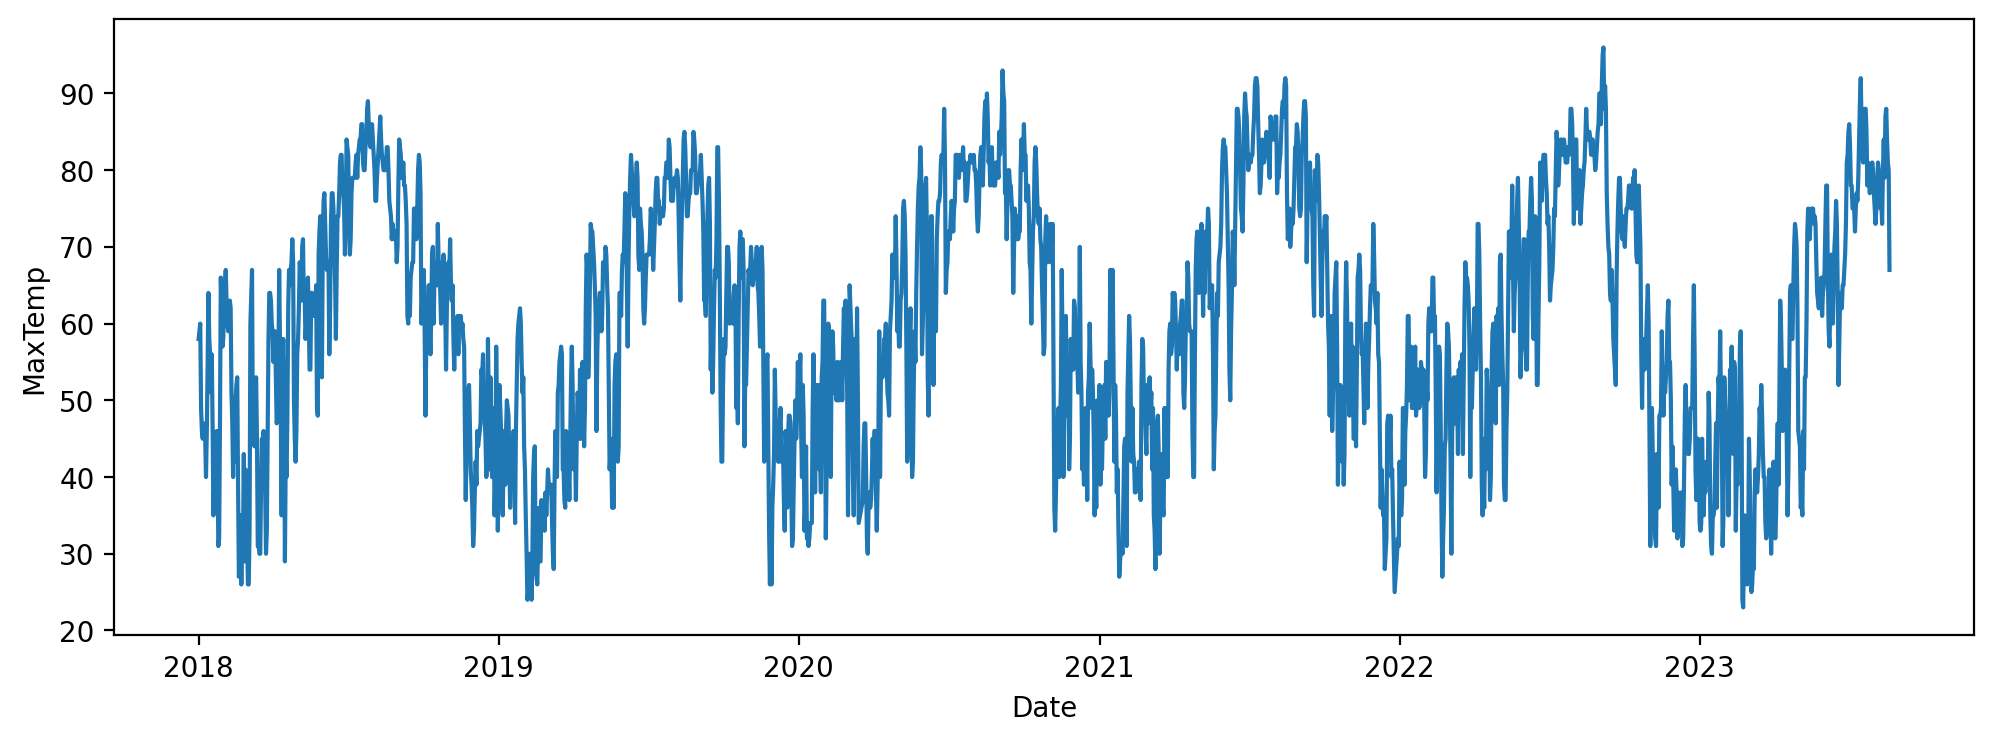

In [144]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(data=mt_df, x='Date', y='MaxTemp')
plt.show()

## Average CAISO Price (LCG Consulting)

In [145]:
acp_df = pd.read_csv('~/Downloads/20180101-20230826 CAISO Average Price.csv')

In [146]:
acp_df.head()

,date,price
0,1/1/2018 12:00:00 AM,38.755050
1,1/1/2018 12:05:00 AM,53.469890
2,1/1/2018 12:10:00 AM,53.469890
3,1/1/2018 12:15:00 AM,53.061716
4,1/1/2018 12:20:00 AM,53.385860


In [147]:
acp_df.tail(10)

,date,price
592706,8/26/2023 8:35:00 AM,20.551390
592707,8/26/2023 8:40:00 AM,20.507690
592708,8/26/2023 8:45:00 AM,20.482913
592709,8/26/2023 8:50:00 AM,20.326553
592710,8/26/2023 8:55:00 AM,19.235236
592711,8/26/2023 9:00:00 AM,18.474200
592712,8/26/2023 9:05:00 AM,16.205666
592713,8/26/2023 9:10:00 AM,18.626500
592714,8/26/2023 9:15:00 AM,20.035560
592715,8/26/2023 9:20:00 AM,19.309663


In [148]:
acp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 592716 entries, 0 to 592715
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    592716 non-null  object 
 1   price   592716 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.0+ MB


In [149]:
acp_df['Datetime'] = pd.to_datetime(acp_df['date'])

/var/folders/v5/j3904wgj3nq84q240xp66d0r0000gn/T/ipykernel_28149/697148952.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  acp_df['Datetime'] = pd.to_datetime(acp_df['date'])


In [150]:
acp_df.isnull().any()

date        False
price       False
Datetime    False
dtype: bool

In [151]:
len(acp_df)

592716

In [152]:
acp_df['Date'] = acp_df['Datetime'].dt.date

In [153]:
acp_df['AvgPrice'] = acp_df.groupby('Date')['price'].transform(lambda val: val.mean())

In [154]:
acp_df.head(3)

,date,price,Datetime,Date,AvgPrice
0,1/1/2018 12:00:00 AM,38.75505,2018-01-01 00:00:00,2018-01-01,35.027855
1,1/1/2018 12:05:00 AM,53.46989,2018-01-01 00:05:00,2018-01-01,35.027855
2,1/1/2018 12:10:00 AM,53.46989,2018-01-01 00:10:00,2018-01-01,35.027855


In [155]:
acp_df.tail(3)

,date,price,Datetime,Date,AvgPrice
592713,8/26/2023 9:10:00 AM,18.626500,2023-08-26 09:10:00,2023-08-26,39.091641
592714,8/26/2023 9:15:00 AM,20.035560,2023-08-26 09:15:00,2023-08-26,39.091641
592715,8/26/2023 9:20:00 AM,19.309663,2023-08-26 09:20:00,2023-08-26,39.091641


In [156]:
acp_df[acp_df['Date'].astype(str) == '2018-01-01']['price'].mean() # spot check head

35.02785466319445

In [157]:
acp_df[acp_df['Date'].astype(str) == '2023-08-26']['price'].mean() # spot check tail

39.091641035398226

In [158]:
acp_df = acp_df.drop(columns=['date', 'AvgPrice', 'Datetime'])

In [159]:
acp_df.head()

,price,Date
0,38.755050,2018-01-01
1,53.469890,2018-01-01
2,53.469890,2018-01-01
3,53.061716,2018-01-01
4,53.385860,2018-01-01


In [160]:
acp_df = acp_df.groupby('Date', as_index=False).mean()

In [161]:
acp_df.head()

,Date,price
0,2018-01-01,35.027855
1,2018-01-02,33.401521
2,2018-01-03,70.573712
3,2018-01-04,39.374058
4,2018-01-05,50.158102


In [162]:
acp_df.tail()

,Date,price
2059,2023-08-22,36.030583
2060,2023-08-23,43.382714
2061,2023-08-24,39.673703
2062,2023-08-25,36.800306
2063,2023-08-26,39.091641


In [163]:
rn_dict = {'price': 'CaisoPrice'}
acp_df = acp_df.rename(columns=rn_dict)

In [164]:
acp_df.head()

,Date,CaisoPrice
0,2018-01-01,35.027855
1,2018-01-02,33.401521
2,2018-01-03,70.573712
3,2018-01-04,39.374058
4,2018-01-05,50.158102


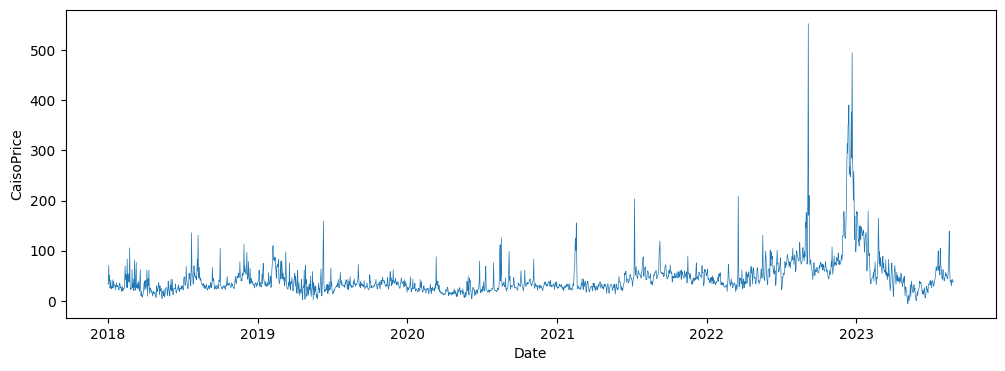

In [165]:
plt.figure(figsize=(12,4))
sns.lineplot(data=acp_df, x='Date', y='CaisoPrice', linewidth=0.5)
plt.show()

## Data Merging

In [166]:
df = hh_df.merge(right=fm_df, on='Datetime', how='outer')

In [167]:
df = df[['Datetime', 'FM_Acre_ft', 'HH_Acre_ft']].copy()

In [168]:
df['Storage'] = df['FM_Acre_ft'] + df['HH_Acre_ft']

In [169]:
df.head()

,Datetime,FM_Acre_ft,HH_Acre_ft,Storage
0,2018-01-01 08:00:00+00:00,51445.0,109262.4,160707.4
1,2018-01-02 08:00:00+00:00,51391.8,108832.6,160224.4
2,2018-01-03 08:00:00+00:00,51391.8,107713.5,159105.3
3,2018-01-04 08:00:00+00:00,51270.5,106513.1,157783.6
4,2018-01-05 08:00:00+00:00,51391.8,105620.7,157012.5


In [170]:
df = df.drop(columns=['FM_Acre_ft','HH_Acre_ft'])

In [171]:
df.head()

,Datetime,Storage
0,2018-01-01 08:00:00+00:00,160707.4
1,2018-01-02 08:00:00+00:00,160224.4
2,2018-01-03 08:00:00+00:00,159105.3
3,2018-01-04 08:00:00+00:00,157783.6
4,2018-01-05 08:00:00+00:00,157012.5


In [172]:
df['Date'] = df['Datetime'].dt.date

In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2058 entries, 0 to 2057
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   Datetime  2058 non-null   datetime64[ns, UTC]
 1   Storage   2058 non-null   float64            
 2   Date      2058 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(1)
memory usage: 48.4+ KB


In [174]:
df.head(1)

,Datetime,Storage,Date
0,2018-01-01 08:00:00+00:00,160707.4,2018-01-01


In [175]:
df.tail(1)

,Datetime,Storage,Date
2057,2023-08-20 07:00:00+00:00,262776.8,2023-08-20


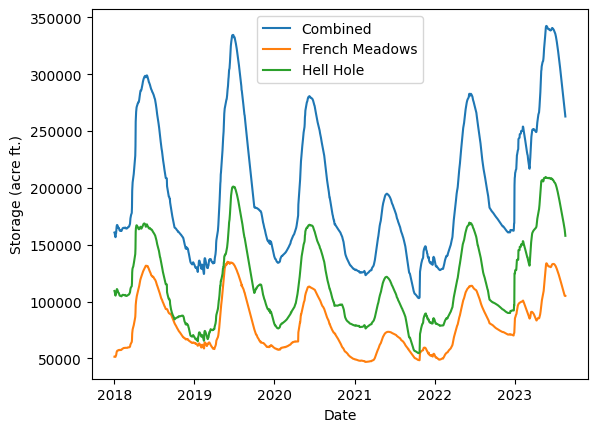

In [176]:
plt.ylabel('Storage (acre ft.)')
plt.xlabel('Date')
sns.lineplot(data=df, x='Datetime', y='Storage', label='Combined')
sns.lineplot(data=fm_df, x='Datetime', y='FM_Acre_ft', label='French Meadows')
sns.lineplot(data=hh_df, x='Datetime', y='HH_Acre_ft', label='Hell Hole')
plt.show()

In [177]:
len(df)

2058

In [178]:
df = df.merge(right=ng_df, how='outer', on='Date')

In [179]:
len(df)

2058

In [180]:
df.head()

,Datetime,Storage,Date,GasPrice
0,2018-01-01 08:00:00+00:00,160707.4,2018-01-01,NaN
1,2018-01-02 08:00:00+00:00,160224.4,2018-01-02,6.24
2,2018-01-03 08:00:00+00:00,159105.3,2018-01-03,6.24
3,2018-01-04 08:00:00+00:00,157783.6,2018-01-04,4.65
4,2018-01-05 08:00:00+00:00,157012.5,2018-01-05,3.77


In [181]:
df.isnull().any(axis=1).sum()

624

In [182]:
df.tail()

,Datetime,Storage,Date,GasPrice
2053,2023-08-16 07:00:00+00:00,270054.8,2023-08-16,2.55
2054,2023-08-17 07:00:00+00:00,268329.2,2023-08-17,2.56
2055,2023-08-18 07:00:00+00:00,266471.3,2023-08-18,2.44
2056,2023-08-19 07:00:00+00:00,264633.1,2023-08-19,NaN
2057,2023-08-20 07:00:00+00:00,262776.8,2023-08-20,NaN


In [183]:
df['GasPrice'] = df['GasPrice'].interpolate()

In [184]:
df.isnull().any(axis=1).sum()

1

In [185]:
df['GasPrice'] = df['GasPrice'].fillna(5) # interpolate didn't get the first record, so manually set it to 5

In [186]:
df.isnull().any(axis=1).sum()

0

In [187]:
df.head(3)

,Datetime,Storage,Date,GasPrice
0,2018-01-01 08:00:00+00:00,160707.4,2018-01-01,5.00
1,2018-01-02 08:00:00+00:00,160224.4,2018-01-02,6.24
2,2018-01-03 08:00:00+00:00,159105.3,2018-01-03,6.24


In [188]:
df['DayOfYear'] = df['Datetime'].dt.day_of_year

In [189]:
df['DayOfYear'].nunique()

366

In [190]:
df.head(3)

,Datetime,Storage,Date,GasPrice,DayOfYear
0,2018-01-01 08:00:00+00:00,160707.4,2018-01-01,5.00,1
1,2018-01-02 08:00:00+00:00,160224.4,2018-01-02,6.24,2
2,2018-01-03 08:00:00+00:00,159105.3,2018-01-03,6.24,3


In [191]:
len(df)

2058

In [192]:
# check that Date is unique in Max Daily Temp 
len(mt_df) == mt_df['Date'].nunique() 

True

In [193]:
df = df.merge(right=mt_df, how='outer', on='Date')

In [194]:
df.head()

,Datetime,Storage,Date,GasPrice,DayOfYear,MaxTemp
0,2018-01-01 08:00:00+00:00,160707.4,2018-01-01,5.00,1,58.0
1,2018-01-02 08:00:00+00:00,160224.4,2018-01-02,6.24,2,59.0
2,2018-01-03 08:00:00+00:00,159105.3,2018-01-03,6.24,3,60.0
3,2018-01-04 08:00:00+00:00,157783.6,2018-01-04,4.65,4,49.0
4,2018-01-05 08:00:00+00:00,157012.5,2018-01-05,3.77,5,46.0


In [195]:
# check that Date is unique in Caiso Daily avg mean price 
len(acp_df) == acp_df['Date'].nunique()

True

In [196]:
len(acp_df)

2064

In [197]:
df = df.merge(right=acp_df, how='outer', on='Date')

In [198]:
len(df)

2064

In [199]:
df.head()

,Datetime,Storage,Date,GasPrice,DayOfYear,MaxTemp,CaisoPrice
0,2018-01-01 08:00:00+00:00,160707.4,2018-01-01,5.00,1.0,58.0,35.027855
1,2018-01-02 08:00:00+00:00,160224.4,2018-01-02,6.24,2.0,59.0,33.401521
2,2018-01-03 08:00:00+00:00,159105.3,2018-01-03,6.24,3.0,60.0,70.573712
3,2018-01-04 08:00:00+00:00,157783.6,2018-01-04,4.65,4.0,49.0,39.374058
4,2018-01-05 08:00:00+00:00,157012.5,2018-01-05,3.77,5.0,46.0,50.158102


In [200]:
df.tail(10)

,Datetime,Storage,Date,GasPrice,DayOfYear,MaxTemp,CaisoPrice
2054,2023-08-17 07:00:00+00:00,268329.2,2023-08-17,2.56,229.0,84.0,59.803049
2055,2023-08-18 07:00:00+00:00,266471.3,2023-08-18,2.44,230.0,81.0,40.905011
2056,2023-08-19 07:00:00+00:00,264633.1,2023-08-19,2.44,231.0,80.0,37.559229
2057,2023-08-20 07:00:00+00:00,262776.8,2023-08-20,2.44,232.0,67.0,41.318354
2058,NaT,NaN,2023-08-21,NaN,NaN,NaN,29.886578
2059,NaT,NaN,2023-08-22,NaN,NaN,NaN,36.030583
2060,NaT,NaN,2023-08-23,NaN,NaN,NaN,43.382714
2061,NaT,NaN,2023-08-24,NaN,NaN,NaN,39.673703
2062,NaT,NaN,2023-08-25,NaN,NaN,NaN,36.800306
2063,NaT,NaN,2023-08-26,NaN,NaN,NaN,39.091641


In [201]:
# check that Date is unique in Oxbow Flows
len(ox_df) == ox_df['Date'].nunique()

True

In [202]:
len(ox_df)

1581

In [203]:
df = df.merge(right=ox_df, how='outer', on='Date')

In [204]:
len(df)

2064

In [205]:
# check that Date is unique in Oxbow Power
len(ox_pwr_df) == ox_pwr_df['Date'].nunique()

True

In [206]:
len(df) == df['Date'].nunique()

True

In [207]:
# don't merge Power with Oxbow Flows model
# df = df.merge(right=ox_pwr_df, how='outer', on='Date')

## Remove Na Rows

In [208]:
df.isnull().any(axis=1).sum()

492

In [209]:
df[df.isnull().any(axis=1)]

,Datetime,Storage,Date,GasPrice,DayOfYear,MaxTemp,CaisoPrice,OxbowFlow
64,2018-03-06 08:00:00+00:00,165661.0,2018-03-06,2.70,65.0,NaN,27.242059,286.862885
96,2018-04-07 07:00:00+00:00,236957.4,2018-04-07,2.80,97.0,48.0,35.614289,NaN
97,2018-04-08 07:00:00+00:00,258212.9,2018-04-08,2.79,98.0,53.0,9.382528,NaN
98,2018-04-09 07:00:00+00:00,263855.5,2018-04-09,2.78,99.0,67.0,43.757436,NaN
274,2018-10-02 07:00:00+00:00,165326.0,2018-10-02,3.14,275.0,67.0,104.769267,NaN
...,...,...,...,...,...,...,...,...
2059,NaT,NaN,2023-08-22,NaN,NaN,NaN,36.030583,NaN
2060,NaT,NaN,2023-08-23,NaN,NaN,NaN,43.382714,NaN
2061,NaT,NaN,2023-08-24,NaN,NaN,NaN,39.673703,NaN
2062,NaT,NaN,2023-08-25,NaN,NaN,NaN,36.800306,NaN


In [210]:
# Drop all the Na rows
df = df.dropna(axis='rows')

In [211]:
len(df)

1572

In [212]:
df.tail()

,Datetime,Storage,Date,GasPrice,DayOfYear,MaxTemp,CaisoPrice,OxbowFlow
2053,2023-08-16 07:00:00+00:00,270054.8,2023-08-16,2.55,228.0,88.0,138.984797,1008.62628
2054,2023-08-17 07:00:00+00:00,268329.2,2023-08-17,2.56,229.0,84.0,59.803049,1012.40747
2055,2023-08-18 07:00:00+00:00,266471.3,2023-08-18,2.44,230.0,81.0,40.905011,1001.06400
2056,2023-08-19 07:00:00+00:00,264633.1,2023-08-19,2.44,231.0,80.0,37.559229,1004.84515
2057,2023-08-20 07:00:00+00:00,262776.8,2023-08-20,2.44,232.0,67.0,41.318354,1012.40747


## Analysis

In [213]:
df.head()

,Datetime,Storage,Date,GasPrice,DayOfYear,MaxTemp,CaisoPrice,OxbowFlow
0,2018-01-01 08:00:00+00:00,160707.4,2018-01-01,5.00,1.0,58.0,35.027855,272.556824
1,2018-01-02 08:00:00+00:00,160224.4,2018-01-02,6.24,2.0,59.0,33.401521,253.365768
2,2018-01-03 08:00:00+00:00,159105.3,2018-01-03,6.24,3.0,60.0,70.573712,672.777900
3,2018-01-04 08:00:00+00:00,157783.6,2018-01-04,4.65,4.0,49.0,39.374058,574.729000
4,2018-01-05 08:00:00+00:00,157012.5,2018-01-05,3.77,5.0,46.0,50.158102,533.206500


In [215]:
#df[['Storage', 'GasPrice', 'DayOfYear','MaxTemp','CaisoPrice','OxbowFlow','OxbowPower']].corr()
df[['Storage', 'GasPrice', 'DayOfYear','MaxTemp','CaisoPrice','OxbowFlow']].corr()

,Storage,GasPrice,DayOfYear,MaxTemp,CaisoPrice,OxbowFlow
Storage,1.000000,-0.025097,0.114616,0.519007,-0.018395,0.474012
GasPrice,-0.025097,1.000000,0.066810,0.118373,0.557854,-0.030082
DayOfYear,0.114616,0.066810,1.000000,0.317556,0.174173,0.093636
MaxTemp,0.519007,0.118373,0.317556,1.000000,0.235116,0.260854
CaisoPrice,-0.018395,0.557854,0.174173,0.235116,1.000000,0.074340
OxbowFlow,0.474012,-0.030082,0.093636,0.260854,0.074340,1.000000


In [216]:
df.select_dtypes(include=np.number).corr()['OxbowFlow'].sort_values()

GasPrice     -0.030082
CaisoPrice    0.074340
DayOfYear     0.093636
MaxTemp       0.260854
Storage       0.474012
OxbowFlow     1.000000
Name: OxbowFlow, dtype: float64

In [219]:
#df.select_dtypes(include=np.number).corr()['OxbowPower'].sort_values()

<Axes: xlabel='CaisoPrice'>

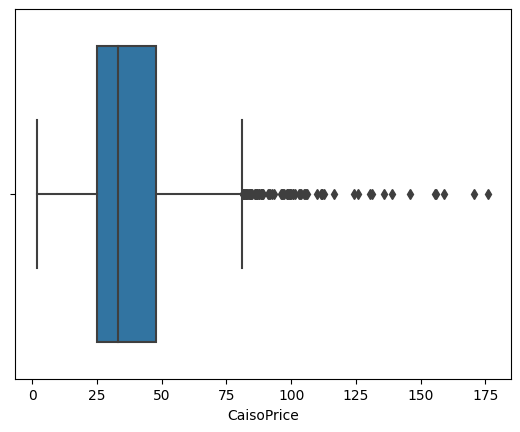

In [220]:
sns.boxplot(data=df[df['CaisoPrice'] < 200], x='CaisoPrice')

In [221]:
# drop Caiso outliers
df = df[df['CaisoPrice'] < 200]

<Axes: xlabel='GasPrice'>

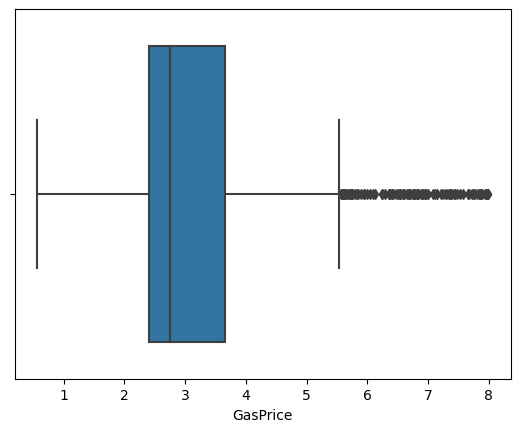

In [222]:
sns.boxplot(data=df[(df['GasPrice'] < 8) & (df['GasPrice'] > 0)], x='GasPrice')

In [223]:
# drop GasPrice outliers
df = df[(df['GasPrice'] < 10) & (df['GasPrice'] > 0)]

<Axes: xlabel='OxbowFlow'>

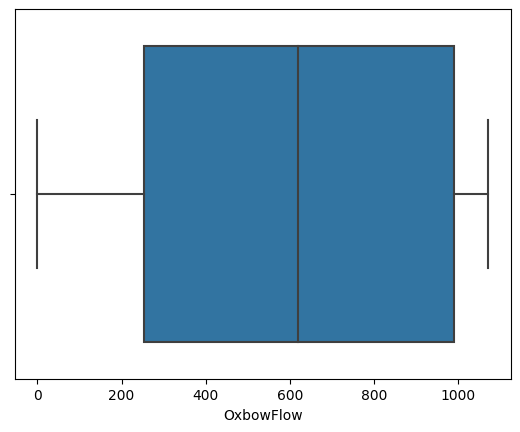

In [224]:
sns.boxplot(data=df, x='OxbowFlow')

<Axes: xlabel='MaxTemp'>

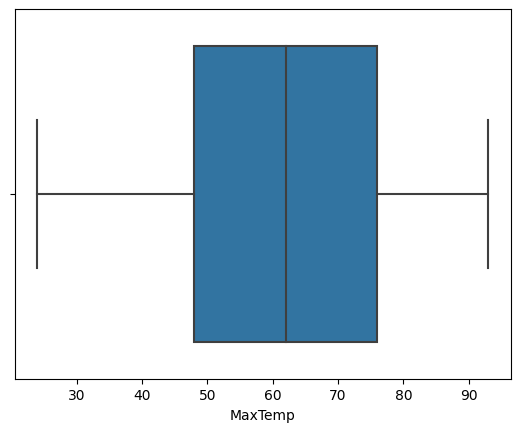

In [225]:
sns.boxplot(data=df, x='MaxTemp')

<Axes: xlabel='Storage'>

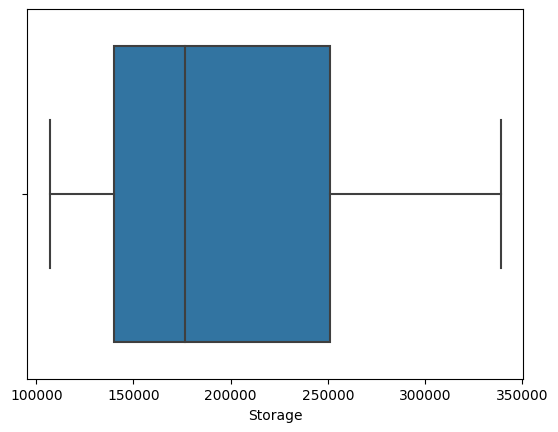

In [226]:
sns.boxplot(data=df, x='Storage')

In [227]:
#sns.boxplot(data=df, x='OxbowPower')

In [228]:
df.to_csv('./data/model_data.csv', index_label='Index')